<a href="https://colab.research.google.com/github/Prakface/Practice/blob/master/Data_Preprocessing_on_our_Previous_Heuristic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn


url='https://raw.githubusercontent.com/Prakface/Practice/master/One_mon_present_full.csv'

#url2='https://raw.githubusercontent.com/Prakface/Practice/master/Final_one_month_prev_features.csv'
url2='https://raw.githubusercontent.com/Prakface/Practice/master/OneMonthPrevFeatures2_USER_ID.csv'

url_h='https://raw.githubusercontent.com/Prakface/Practice/master/heuristic_labels.csv'

data = pd.read_csv(url) 

data2= pd.read_csv(url2)

print("Data Shape:", data.shape) 

#data=pd.read_csv(url)

df=pd.DataFrame(data)
print(data.head()) 


data_modified= data.dropna()

data_modified.to_csv("modifiedData.csv", index=False)


df2=pd.read_csv("modifiedData.csv")

print(df2[0:6])

print(df2['result'])

df_main=df2[df2.columns[~df2.columns.isin(['user_name'])]]

print(df_main.columns)

print(len(df_main.columns))

  
# X_1, y_1 means present tweets' data
X_1=df_main[df_main.columns[~df_main.columns.isin(['time', 'tweet_id','result'])]] #removing result attribute as it is class label, hence we get 34 attributes

X_1=X_1.iloc[:,1:len(X_1.columns)].values   #removing the unnamed attribute

#df_1_main=df_main[df_main.columns[~df_main.columns.isin(['time', 'tweet_id','result'])]]
df_1_main=df_main[df_main.columns[~df_main.columns.isin(['time', 'Unnamed: 0','tweet_id'])]] #we are retianing result(class label)
x_1=df_main[df_main.columns[~df_main.columns.isin(['time', 'tweet_id','result'])]]
x_1=x_1.iloc[:,1:len(x_1.columns)].values 
y_1=df_main.loc[:, ['result']].values


print(type(X_1), type(y_1), type(x_1), type(y_1))
print("\n after processing the tcolumns are : \n ", df_1_main.columns)

print(X_1.shape)
print(y_1.shape)


Data Shape: (1908, 40)
  Unnamed: 0 cat1  cat10  ...      tweet_id  url      user_name
0          0    0      0  ...  8.323790e+17  0.0  THEJEROMEOWEN
1          1    0      0  ...  8.323786e+17  0.0       Acejinjo
2          2    0      0  ...  8.323780e+17  0.0     RabRakha21
3          3    0      0  ...  8.323777e+17  0.0       RS_Aloha
4          4    0      0  ...  8.323767e+17  0.0  preciselyizzy

[5 rows x 40 columns]
   Unnamed: 0  cat1  cat10  ...      tweet_id  url        user_name
0           0     0      0  ...  8.323790e+17  0.0    THEJEROMEOWEN
1           1     0      0  ...  8.323786e+17  0.0         Acejinjo
2           2     0      0  ...  8.323780e+17  0.0       RabRakha21
3           3     0      0  ...  8.323777e+17  0.0         RS_Aloha
4           4     0      0  ...  8.323767e+17  0.0    preciselyizzy
5           5     0      0  ...  8.323759e+17  0.0  thefireistarted

[6 rows x 40 columns]
0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 

In [3]:
df_1_main.result.value_counts()

0.0    959
1.0    947
Name: result, dtype: int64

In [4]:
df_1_main.drop(['image'],axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [5]:
print("\n for class stress =0")
print(df[df.result == 0.0].head(10))

print(" \nfor class stress =1")
print(df[df.result == 1.0].head(10))



 for class stress =0
    Unnamed: 0 cat1  cat10  ...      tweet_id  url        user_name
947          0    0      0  ...  8.341909e+17  1.0     BadassButton
948          1    0      0  ...  8.341890e+17  0.0     MsBlueShines
949          2    0      0  ...  8.341885e+17  0.0    JaidenGameDev
950          3    0      0  ...  8.341827e+17  0.0        virgocuIt
951          4    0      1  ...  8.341824e+17  0.0  JadeHitchmoughx
952          5    0      0  ...  8.341795e+17  0.0   homoaesthetics
953          6    0      0  ...  8.341761e+17  0.0           4OH1k_
954          7    0      0  ...  8.341760e+17  0.0         hkalechm
955          8    0      0  ...  8.341755e+17  1.0       Rhonddalad
956          9    0      0  ...  8.341715e+17  0.0          iIIsans

[10 rows x 40 columns]
 
for class stress =1
  Unnamed: 0 cat1  cat10  ...      tweet_id  url        user_name
0          0    0      0  ...  8.323790e+17  0.0    THEJEROMEOWEN
1          1    0      0  ...  8.323786e+17  0.0    

In [6]:
df_1_main['pre_clean_len'] = [len(t) for t in df_1_main.text]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [7]:
data2= pd.read_csv(url2)

print("Data Shape:", data2.shape) 

#data=pd.read_csv(url)

df_prev=pd.DataFrame(data2)
print(data2.head()) 


data2_modified= data2.dropna()

data2_modified.to_csv("modifiedData2.csv", index=False)


df_2=pd.read_csv("modifiedData2.csv")

print(df_2[0:6])

print(df_2['result'])

df_main2=df_2[df_2.columns[~df_2.columns.isin([ 'user_name'])]]

print(df_main2.columns)

print(len(df_main2.columns))

  

X_2=df_main2[df_main2.columns[~df_main2.columns.isin(['time', 'tweet_id','result'])]] #removing result attribute as it is class label, hence we get 34 attributes

X_2=X_2.iloc[:,1:len(X_2.columns)].values   #removing the unnamed attribute
df_2_main=df_main2[df_main2.columns[~df_main2.columns.isin(['time', 'Unnamed: 0','tweet_id'])]] #we are retianing result(class label)
x_2=df_main2[df_main2.columns[~df_main2.columns.isin(['time', 'tweet_id','result'])]]
x_2=x_2.iloc[:,1:len(x_2.columns)].values 
y_2=df_main2.loc[:, ['result']].values


print(type(X_2), type(y_2), type(x_2), type(y_2))

print(X_2.shape)
print(y_2.shape)

Data Shape: (3273, 40)
              Users_ID  cat1  cat10  ...             tweet_id  url      user_name
0            205281515     0      0  ...  1155575657402961920    1  THEJEROMEOWEN
1            205281515     0      0  ...  1155459426243043328    0  THEJEROMEOWEN
2  1126967948504125440     0      0  ...  1126969730307448832    0     rabrakha14
3           2858633976     0      0  ...  1155277550794338304    0       RS_Aloha
4           2858633976     0      0  ...  1155188179395207168    0       RS_Aloha

[5 rows x 40 columns]
              Users_ID  cat1  cat10  ...             tweet_id  url      user_name
0            205281515     0      0  ...  1155575657402961920    1  THEJEROMEOWEN
1            205281515     0      0  ...  1155459426243043328    0  THEJEROMEOWEN
2  1126967948504125440     0      0  ...  1126969730307448832    0     rabrakha14
3           2858633976     0      0  ...  1155277550794338304    0       RS_Aloha
4           2858633976     0      0  ...  1155188179

In [66]:
import pandas as pd
import numpy as np

df_h=pd.read_csv(url_h)

print(df_h.columns)


'''
the following way is wrong
label1=df_h.heuristic1.values
label_1=df_h.heuristic1_1.values
label2=df_h.heuristic2.values
label3=df_h.heuristic3.values

print(type(label1), type(label2), type(label3))



print(type(label1), type(label2), type(label3))

print(y_1.shape, label1.shape, label2.shape, label3.shape)

#print(len(label1),len(label2),len(label3), len(label_1))

'''




label1=df_h.loc[:, ['heuristic1']].values
label_1=df_h.loc[:,['heuristic1_1']].values
label2=df_h.loc[:, ['heuristic2']].values
label3=df_h.loc[:, ['heuristic3']].values

print(type(label1), type(label2), type(label3))



print(type(label1), type(label2), type(label3))

print(y_1.shape, label1.shape, label2.shape, label3.shape)


tem1y=np.append(y_1, label1, axis=0)
tem2y=np.append(y_1, label2, axis=0)
tem3y=np.append(y_1, label3, axis=0)

tem_1y=np.append(y_1, label_1, axis=0)

#T_h1=torch.from_numpy(tem1y)
#T_h2=torch.from_numpy(tem2y)
#T_h3=torch.from_numpy(tem3y)
#T_h_1=torch.from_numpy(tem_1y)

#y_final=label1 #(only rpevious labels of heuristic1)

y_final=label2 #(only rpevious labels of heuristic2)

Index(['Unnamed: 0', 'heuristic1', 'heuristic1_1', 'heuristic2', 'heuristic3'], dtype='object')
<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>
(1906, 1) (3273, 1) (3273, 1) (3273, 1)


In [67]:
##substituting result with y_final (heuristic labels)
print(len(y_final), len(df_2_main['result']))

for i in range(len(y_final)):
  df_2_main['result'][i] = y_final[i]

  

3273 3273


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [68]:
df_2_main.result.value_counts()

1    1677
0    1596
Name: result, dtype: int64

In [69]:
df_2_main.drop(['image'],axis=1,inplace=True)

KeyError: ignored

In [70]:
print("\n for class stress =0")
print(df_2_main[df_2_main.result == 0.0].head(10))

print(" \nfor class stress =1")
print(df_2_main[df_2_main.result == 1.0].head(10))



 for class stress =0
               Users_ID  cat1  ...  url  pre_clean_len
0             205281515     0  ...    1             70
1             205281515     0  ...    0             66
2   1126967948504125440     0  ...    0            121
3            2858633976     0  ...    0            106
4            2858633976     0  ...    0             25
5             955893199     0  ...    0            140
6             955893199     0  ...    0            140
9              65541865     0  ...    0            130
10             65541865     0  ...    0             14
11            198610208     0  ...    0            140

[10 rows x 37 columns]
 
for class stress =1
       Users_ID  cat1  ...  url  pre_clean_len
7     115498371     0  ...    0            140
8     115498371     0  ...    0             50
88     45190168     0  ...    0            139
89     45190168     0  ...    0            140
234   246815165     0  ...    0             75
235   246815165     0  ...    1             6

In [71]:
df_2_main['pre_clean_len'] = [len(t) for t in df_2_main.text]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [72]:
from pprint import pprint
data_dict = {
    'sentiment':{
        'type':df_2_main.result.dtype,
        'description':'sentiment class - 0:negative, 1:positive'
    },
    'text':{
        'type':df_2_main.text.dtype,
        'description':'tweet text'
    },
    'pre_clean_len':{
        'type':df_2_main.pre_clean_len.dtype,
        'description':'Length of the tweet before cleaning'
    },
    'dataset_shape':df_2_main.shape
}
pprint(data_dict)

{'dataset_shape': (3273, 37),
 'pre_clean_len': {'description': 'Length of the tweet before cleaning',
                   'type': dtype('int64')},
 'sentiment': {'description': 'sentiment class - 0:negative, 1:positive',
               'type': dtype('int64')},
 'text': {'description': 'tweet text', 'type': dtype('O')}}


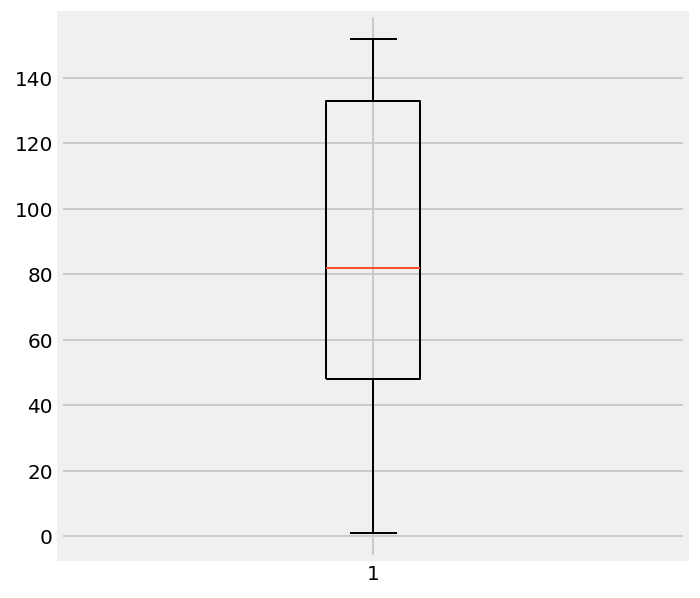

In [73]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(df_2_main.pre_clean_len)
plt.show()

In [74]:
df_2_main[df_2_main.pre_clean_len > 140].head(10)

## HTML encoding has not been converted to text in few , and ended up in text field as ‘&amp’,’&quot’,etc and hence text are exceeding 140 character limits !!

,Users_ID,cat1,cat10,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,favorite_count,hour,level,nadj,nadv,nemoji,nlevel,nword,orginal,padj,padv,pemoji,plevel,pnoun,punc1,punc2,punc3,pword,question,result,retweets_count,sarcasm,sentiment,text,url,pre_clean_len
96,19898136,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,1,1,0,1,0,1,1,0,0,0,1,0,0,0,0,1,@amandapalmer @kfury Siouxsie &amp; the Banshe...,1,144
228,21530452,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,1,0,1,1,0,1,0,3,0,0,1,0,0,21,0,1,RT @kanaribroken: 2 new masterposts are up at ...,0,144
258,1424686896,0,0,0,0,0,0,0,0,0,0,0,14,0,0,-1,0,-1,0,0,0,0,0,0,2,0,0,0,0,0,0,3239,0,-1,RT @RepKinzinger: I deeply disagree with the e...,0,144
273,564054739,0,1,0,0,0,0,0,0,0,0,0,6,0,1,-1,0,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,120321,0,-1,RT @shaynenicolee: called my parents yesterday...,0,147
276,48715073,1,0,0,1,0,0,0,0,0,0,0,20,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,&lt;clears throat&gt; \n🎶in the arms of the an...,1,146
277,48715073,0,1,0,0,0,0,0,0,0,0,0,19,0,0,0,0,0,2,1,0,1,0,1,1,1,0,0,2,0,0,0,0,1,Hi @craigieonmain! My husband &amp; I enjoyed ...,1,148
402,1051117238,0,0,0,0,0,0,0,0,0,1,8,7,0,0,-1,0,-1,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,-1,Anytime after a long day out I always take off...,1,144
546,1590405854,0,0,0,0,0,0,0,0,0,0,0,11,0,0,0,0,0,2,0,2,1,0,1,2,0,0,0,2,0,1,12,0,1,RT @Aludecor: #ContestAlert\n#Friends are spec...,0,144
621,104663678,0,0,0,0,0,0,0,0,0,0,0,4,0,0,-1,0,-1,0,1,0,0,0,0,1,1,1,0,0,1,0,0,0,-1,"@GoBigGurlsGo Oh shit! Baby, why are u in ""my""...",1,144
735,355661572,0,0,0,0,0,0,0,0,0,0,0,23,0,0,-1,0,-1,0,0,0,0,0,0,2,0,0,0,0,0,0,11587,0,-1,"RT @NotGeauxGabby: I was homeless, facing 27 f...",0,144


In [75]:
df_2_main.text[320]
df_2_main.text[422]

'RT @hansrosez: Hey guys, I just found out that I’m getting married. It’s been a shock to all of us and there’s a lot to do to prepare for a…'

In [76]:
from bs4 import BeautifulSoup
example1 = BeautifulSoup(df_2_main.text[320], 'lxml')
print(example1.get_text())

we called it a night at r1 early and as it turns out, i don't have enough points to buy the fucken qpro outfit i wa… https://t.co/AZ4yqbq4LU


In [0]:
##removing @ mentions


In [0]:
#removing urls
import re

#re.sub('https?://[A-Za-z0-9./]+','',df.text[0])

for i in df_2_main.text:
  re.sub('https?://[A-Za-z0-9./]+','',i)
  #re.sub('RT @[a-zA-Z0-9]+:','',i) #removing RT in retweet



In [78]:
print(df_2_main.text[320],"\n")
print(df_2_main.text[422])

we called it a night at r1 early and as it turns out, i don't have enough points to buy the fucken qpro outfit i wa… https://t.co/AZ4yqbq4LU 

RT @hansrosez: Hey guys, I just found out that I’m getting married. It’s been a shock to all of us and there’s a lot to do to prepare for a…


In [0]:
for i in df_2_main.text:
  re.sub("[^a-zA-Z]", " ", i) #removing non english alphabet characters

In [0]:
## Combined pre-processing functions

import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import re
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

pat1 = r'@[A-Za-z0-9_]+'
pat2 = r'https?://[^ ]+'
combined_pat = r'|'.join((pat1, pat2))
www_pat = r'www.[^ ]+'
negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}
neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')

def tweet_cleaner_updated(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    try:
        bom_removed = souped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        bom_removed = souped
    stripped = re.sub(combined_pat, '', bom_removed)
    stripped = re.sub(www_pat, '', stripped)
    lower_case = stripped.lower()
    neg_handled = neg_pattern.sub(lambda x: negations_dic[x.group()], lower_case)
    letters_only = re.sub("[^a-zA-Z]", " ", neg_handled)
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = [x for x  in tok.tokenize(letters_only) if len(x) > 1]
    return (" ".join(words)).strip()

In [81]:
#nums = [0,400000,800000,1200000,1600000]
nums = [0,400,800,1200,1600, 2000, 2400, 2800, 3200,3300]
total=3273
print("\n Cleaning and parsing the tweets...\n")
clean_tweet_texts = []
for i in range(total):
    if( (i+1)%100 == 0 ):
      print("Tweets %d of %d has been processed" % ( i+1, total))                                                                   
    clean_tweet_texts.append(tweet_cleaner_updated(df_2_main['text'][i]))



 Cleaning and parsing the tweets...

Tweets 100 of 3273 has been processed
Tweets 200 of 3273 has been processed
Tweets 300 of 3273 has been processed
Tweets 400 of 3273 has been processed
Tweets 500 of 3273 has been processed
Tweets 600 of 3273 has been processed
Tweets 700 of 3273 has been processed


/usr/local/lib/python3.6/dist-packages/bs4/__init__.py:336: UserWarning: "https://t.co/0rpD4WGHrI" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/usr/local/lib/python3.6/dist-packages/bs4/__init__.py:336: UserWarning: "https://t.co/EGVvMCtlgp" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/usr/local/lib/python3.6/dist-packages/bs4/__init__.py:336: UserWarning: "https://t.co/7QHcaCU3jl" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful S

Tweets 800 of 3273 has been processed
Tweets 900 of 3273 has been processed
Tweets 1000 of 3273 has been processed
Tweets 1100 of 3273 has been processed
Tweets 1200 of 3273 has been processed
Tweets 1300 of 3273 has been processed
Tweets 1400 of 3273 has been processed
Tweets 1500 of 3273 has been processed


/usr/local/lib/python3.6/dist-packages/bs4/__init__.py:336: UserWarning: "https://t.co/DfWMj5mEcG" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/usr/local/lib/python3.6/dist-packages/bs4/__init__.py:336: UserWarning: "https://t.co/DUpxhBiSv5" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/usr/local/lib/python3.6/dist-packages/bs4/__init__.py:336: UserWarning: "https://t.co/61YfHJj99V" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful S

Tweets 1600 of 3273 has been processed
Tweets 1700 of 3273 has been processed
Tweets 1800 of 3273 has been processed
Tweets 1900 of 3273 has been processed
Tweets 2000 of 3273 has been processed
Tweets 2100 of 3273 has been processed
Tweets 2200 of 3273 has been processed
Tweets 2300 of 3273 has been processed


/usr/local/lib/python3.6/dist-packages/bs4/__init__.py:336: UserWarning: "https://t.co/O8RG56Jo0Q" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/usr/local/lib/python3.6/dist-packages/bs4/__init__.py:336: UserWarning: "https://t.co/cyjmOBPiGE" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/usr/local/lib/python3.6/dist-packages/bs4/__init__.py:336: UserWarning: "https://t.co/hMxDkUNvYq" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful S

Tweets 2400 of 3273 has been processed
Tweets 2500 of 3273 has been processed
Tweets 2600 of 3273 has been processed
Tweets 2700 of 3273 has been processed
Tweets 2800 of 3273 has been processed
Tweets 2900 of 3273 has been processed
Tweets 3000 of 3273 has been processed
Tweets 3100 of 3273 has been processed


/usr/local/lib/python3.6/dist-packages/bs4/__init__.py:336: UserWarning: "https://t.co/vOdWDeu95H" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/usr/local/lib/python3.6/dist-packages/bs4/__init__.py:336: UserWarning: "https://t.co/WA8tyNI6s2" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/usr/local/lib/python3.6/dist-packages/bs4/__init__.py:336: UserWarning: "https://t.co/j2Zoh2v47s" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful S

Tweets 3200 of 3273 has been processed


In [82]:
clean_df = pd.DataFrame(clean_tweet_texts,columns=['text'])
clean_df['target'] = df_2_main.result
print(clean_df.head())
print(clean_df.tail())


                                                text  target
0            hahahah this tweet from back in the day       0
1                         rt not all hero wear capes       0
2              dress is beautiful but hairstyles not       0
3  had teleported already sorry got crap loot if ...       0
4                                     kills per hour       0
                                                   text  target
3268  this past weekend really something have to get...       1
3269                                                 rt       1
3270                                                 rt       1
3271                     what great idea books business       1
3272  thursdayvibes favouriteday survived the day wi...       1


In [85]:
clean_df.to_csv('clean_tweet_previous_heuristic2.csv',encoding='utf-8')
csv = 'clean_tweet_previous_heuristic2.csv'
my_df = pd.read_csv(csv,index_col=0)
my_df.head()

,text,target
0,hahahah this tweet from back in the day,0
1,rt not all hero wear capes,0
2,dress is beautiful but hairstyles not,0
3,had teleported already sorry got crap loot if ...,0
4,kills per hour,0


In [0]:
##To download the csv 
from google.colab import files
files.download('clean_tweet_previous_heuristic2.csv') 


In [87]:
my_df.info()
#to see if there are any null values or NA

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3273 entries, 0 to 3272
Data columns (total 2 columns):
text      3130 non-null object
target    3273 non-null int64
dtypes: int64(1), object(1)
memory usage: 76.7+ KB


In [88]:
print(my_df[my_df.isnull().any(axis=1)].head())
print(np.sum(my_df.isnull().any(axis=1)))

    text  target
67   NaN       0
75   NaN       0
98   NaN       0
104  NaN       0
105  NaN       0
143


In [89]:
my_df.isnull().any(axis=0)

my_df=my_df.dropna()

print(my_df[my_df.isnull().any(axis=1)].head())
print(np.sum(my_df.isnull().any(axis=1)))

Empty DataFrame
Columns: [text, target]
Index: []
0


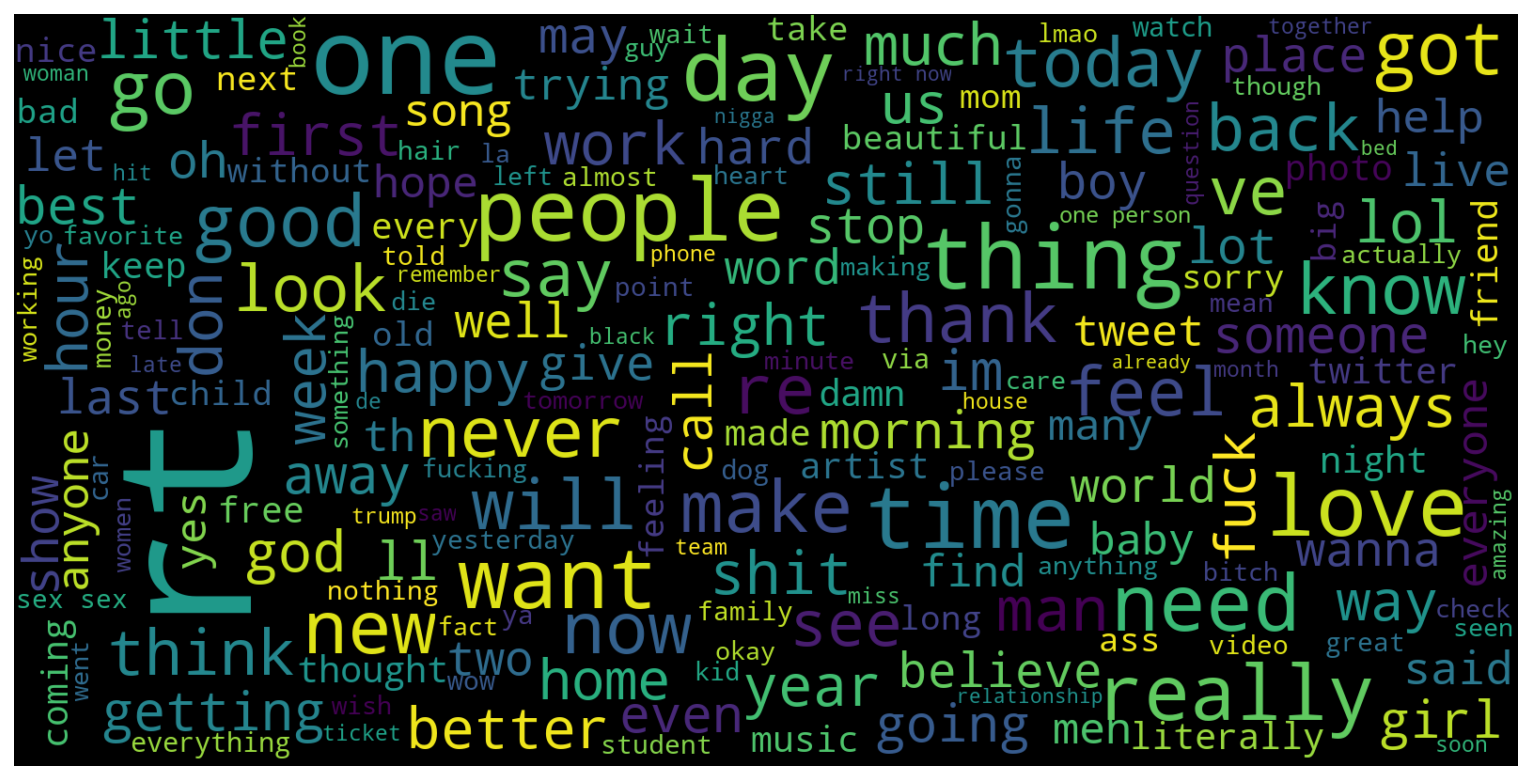

In [90]:
###WORD CLOUD For stress negative tweets (which have no stress)
neg_tweets = my_df[my_df.target == 0]
neg_string = []
for t in neg_tweets.text:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

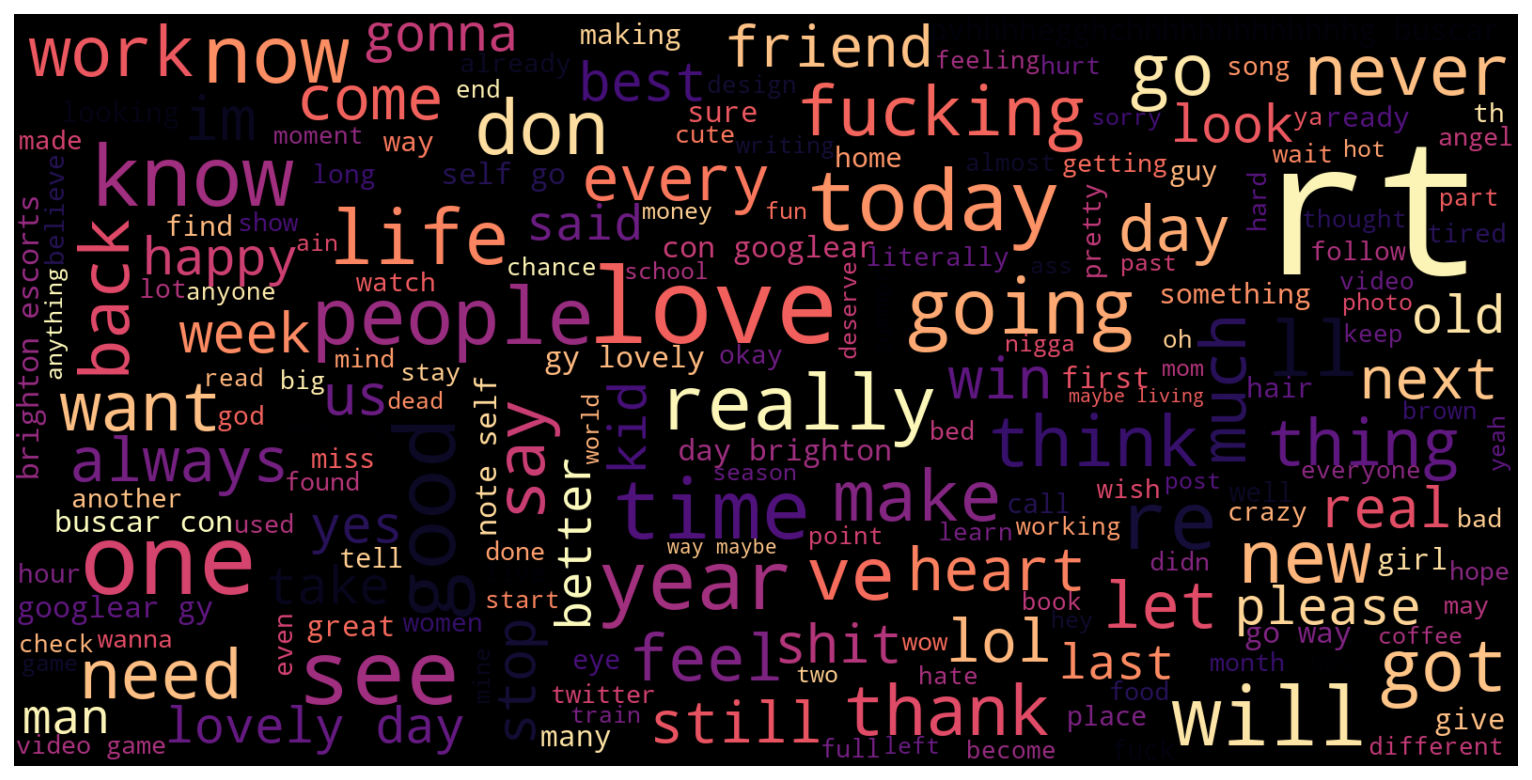

In [91]:
#Word cloud for stress positive class tweets
pos_tweets = my_df[my_df.target == 1]
pos_string = []
for t in pos_tweets.text:
    pos_string.append(t)
pos_string = pd.Series(pos_string).str.cat(sep=' ')

wordcloud = WordCloud(width=1600,
                      height=800,max_font_size=200,colormap='magma').generate(pos_string)
plt.figure(figsize=(12,10)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis("off") 
plt.show()



In [92]:
##More data visualization

from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer()
cvec.fit(my_df.text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [93]:
len(cvec.get_feature_names())



7138

In [0]:
neg_doc_matrix = cvec.transform(my_df[my_df.target == 0].text)
pos_doc_matrix = cvec.transform(my_df[my_df.target == 1].text)
neg_tf = np.sum(neg_doc_matrix,axis=0)
pos_tf = np.sum(pos_doc_matrix,axis=0)
neg = np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))
term_freq_df = pd.DataFrame([neg,pos],columns=cvec.get_feature_names()).transpose()

In [96]:
document_matrix = cvec.transform(my_df.text)


## checking for stress positive tweets

print(my_df[my_df.target == 1].head())
print(my_df[my_df.target == 1].tail())


                                                  text  target
7    rt there lots of unconventional favorite got c...       1
8                   rt good morning to arya stark only       1
88   literally washing my hair getting my hair cut ...       1
89   rt since we are not leaving the eu next friday...       1
234               rt one of the coolest things ve seen       1
                                                   text  target
3268  this past weekend really something have to get...       1
3269                                                 rt       1
3270                                                 rt       1
3271                     what great idea books business       1
3272  thursdayvibes favouriteday survived the day wi...       1


In [97]:
#measuring time for computing count vectors for positive tweets

%%time
pos_batches = np.linspace(0,946,100).astype(int)
i=0
pos_tf = []
while i < len(pos_batches)-1:
    batch_result = np.sum(document_matrix[pos_batches[i]:pos_batches[i+1]].toarray(),axis=0)
    pos_tf.append(batch_result)
    if (i % 10 == 0) | (i == len(pos_batches)-2):
        print(pos_batches[i+1],"entries' term freuquency calculated")
    i += 1

9 entries' term freuquency calculated
105 entries' term freuquency calculated
200 entries' term freuquency calculated
296 entries' term freuquency calculated
391 entries' term freuquency calculated
487 entries' term freuquency calculated
582 entries' term freuquency calculated
678 entries' term freuquency calculated
774 entries' term freuquency calculated
869 entries' term freuquency calculated
946 entries' term freuquency calculated
CPU times: user 37.4 ms, sys: 2.94 ms, total: 40.3 ms
Wall time: 41.6 ms


In [98]:
#For negatiove stress tweets
print(my_df[my_df.target == 0].head())
print(my_df[my_df.target == 0].tail())


                                                text  target
0            hahahah this tweet from back in the day       0
1                         rt not all hero wear capes       0
2              dress is beautiful but hairstyles not       0
3  had teleported already sorry got crap loot if ...       0
4                                     kills per hour       0
                                                   text  target
2636  you believe in god thats the wrong question do...       0
2659  just sold hot file set on niteflirt check it o...       0
2660  online right now on skyprivate my private profile       0
3003             rt and still bright out legit so happy       0
3004  rt hope is dangerous thing for woman like me t...       0


In [99]:
##Measuring time for computing count vectors for negative stress tweets

%%time 
neg_batches = np.linspace(947,1906,100).astype(int)
i=0
neg_tf = []
while i < len(neg_batches)-1:
    batch_result = np.sum(document_matrix[neg_batches[i]:neg_batches[i+1]].toarray(),axis=0)
    neg_tf.append(batch_result)
    if (i % 10 == 0) | (i == len(neg_batches)-2):
      print(neg_batches[i+1],"entries' term freuquency calculated")
    i += 1

956 entries' term freuquency calculated
1053 entries' term freuquency calculated
1150 entries' term freuquency calculated
1247 entries' term freuquency calculated
1344 entries' term freuquency calculated
1441 entries' term freuquency calculated
1537 entries' term freuquency calculated
1634 entries' term freuquency calculated
1731 entries' term freuquency calculated
1828 entries' term freuquency calculated
1906 entries' term freuquency calculated
CPU times: user 37.3 ms, sys: 2.02 ms, total: 39.3 ms
Wall time: 40.3 ms


In [100]:
#Computing term frequency

neg = np.sum(neg_tf,axis=0)
pos = np.sum(pos_tf,axis=0)
term_freq_df = pd.DataFrame([neg,pos],columns=cvec.get_feature_names()).transpose()
term_freq_df.head()

,0,1
aaaa,0,1
aaaaaaaaaa,0,0
aarun,1,1
ab,1,0
abandoning,0,1


In [101]:
term_freq_df.columns = ['stress_negative', 'stress_positive']
term_freq_df['total'] = term_freq_df['stress_negative'] + term_freq_df['stress_positive']
term_freq_df.sort_values(by='total', ascending=False).iloc[:10]

,stress_negative,stress_positive,total
rt,334,395,729
the,306,327,633
to,283,284,567
you,217,189,406
and,201,170,371
my,151,180,331
is,157,151,308
of,152,134,286
in,126,146,272
it,130,124,254


In [102]:
print(np.sum([[0, 1], [0, 5], [1,3]], axis=0))
print(np.sum([[0, 1], [0, 5], [1,3]], axis=1))


[1 9]
[1 5 4]


Text(0.5, 1.0, 'Top 500 tokens in tweets')

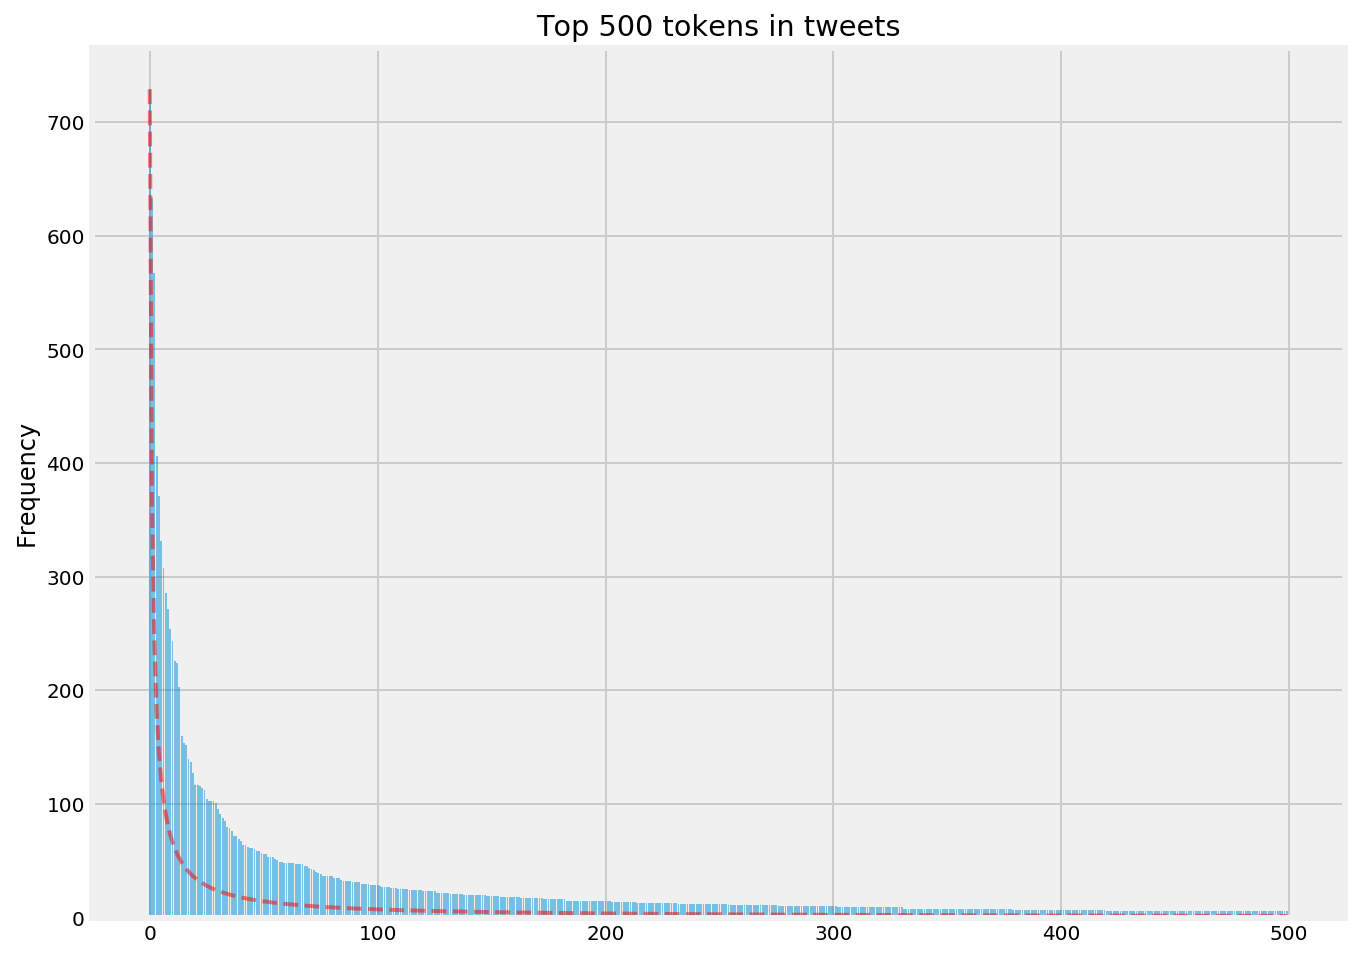

In [103]:
#Verifying Zipf's law frequency inversely proportional to rank (or rank power alpha)

y_pos = np.arange(500)
plt.figure(figsize=(10,8))
s = 1
expected_zipf = [term_freq_df.sort_values(by='total', ascending=False)['total'][0]/(i+1)**s for i in y_pos]
plt.bar(y_pos, term_freq_df.sort_values(by='total', ascending=False)['total'][:500], align='center', alpha=0.5)
plt.plot(y_pos, expected_zipf, color='r', linestyle='--',linewidth=2,alpha=0.5)
plt.ylabel('Frequency')
plt.title('Top 500 tokens in tweets')

In [104]:
##Log plot of Zipf's law
from pylab import *
counts = term_freq_df.total
tokens = term_freq_df.index
ranks = arange(1, len(counts)+1)
indices = argsort(-counts)
frequencies = counts[indices]
plt.figure(figsize=(8,6))
plt.ylim(1,10**6)
plt.xlim(1,10**6)
loglog(ranks, frequencies, marker=".")
plt.plot([1,frequencies[0]],[frequencies[0],1],color='r')
title("Zipf plot for tweets tokens")
xlabel("Frequency rank of token")
ylabel("Absolute frequency of token")
grid(True)
for n in list(logspace(-0.5, log10(len(counts)-2), 25).astype(int)):
    dummy = text(ranks[n], frequencies[n], " " + tokens[indices[n]], 
                 verticalalignment="bottom",
                 horizontalalignment="left")

fig = plt.figure(1, figsize=(8, 14), frameon=False, dpi=100)
fig.add_axes([0, 0, 1, 1])
ax = plt.gca()

corners = ((x1, y1), (x2, y2))
ax.update_datalim(corners)


NameError: ignored

ValueError: ignored

<Figure size 576x432 with 2 Axes>

In [105]:
####Removing Stop Words

from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english',max_features=10000)
cvec.fit(my_df.text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=10000, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [0]:
document_matrix = cvec.transform(my_df.text)

In [107]:
#measuring time for computing count vectors for positive tweets

%%time
pos_batches = np.linspace(0,946,100).astype(int)
i=0
pos_tf = []
while i < len(pos_batches)-1:
    batch_result = np.sum(document_matrix[pos_batches[i]:pos_batches[i+1]].toarray(),axis=0)
    pos_tf.append(batch_result)
    if (i % 10 == 0) | (i == len(pos_batches)-2):
        print(pos_batches[i+1],"entries' term freuquency calculated")
    i += 1

9 entries' term freuquency calculated
105 entries' term freuquency calculated
200 entries' term freuquency calculated
296 entries' term freuquency calculated
391 entries' term freuquency calculated
487 entries' term freuquency calculated
582 entries' term freuquency calculated
678 entries' term freuquency calculated
774 entries' term freuquency calculated
869 entries' term freuquency calculated
946 entries' term freuquency calculated
CPU times: user 36.5 ms, sys: 5.88 ms, total: 42.4 ms
Wall time: 52.5 ms


In [108]:
##Measuring time for computing count vectors for negative stress tweets

%%time 
neg_batches = np.linspace(947,1906,100).astype(int)
i=0
neg_tf = []
while i < len(neg_batches)-1:
    batch_result = np.sum(document_matrix[neg_batches[i]:neg_batches[i+1]].toarray(),axis=0)
    neg_tf.append(batch_result)
    if (i % 10 == 0) | (i == len(neg_batches)-2):
      print(neg_batches[i+1],"entries' term freuquency calculated")
    i += 1

956 entries' term freuquency calculated
1053 entries' term freuquency calculated
1150 entries' term freuquency calculated
1247 entries' term freuquency calculated
1344 entries' term freuquency calculated
1441 entries' term freuquency calculated
1537 entries' term freuquency calculated
1634 entries' term freuquency calculated
1731 entries' term freuquency calculated
1828 entries' term freuquency calculated
1906 entries' term freuquency calculated
CPU times: user 32.3 ms, sys: 956 µs, total: 33.2 ms
Wall time: 34.6 ms


In [109]:
#After removing stop words
neg = np.sum(neg_tf,axis=0)
pos = np.sum(pos_tf,axis=0)
term_freq_df2 = pd.DataFrame([neg,pos],columns=cvec.get_feature_names()).transpose()
term_freq_df2.columns = ['negative', 'positive']
term_freq_df2['total'] = term_freq_df2['negative'] + term_freq_df2['positive']
term_freq_df2.sort_values(by='total', ascending=False).iloc[:10]

,negative,positive,total
rt,334,395,729
just,56,61,117
like,42,38,80
love,37,30,67
people,32,27,59
time,31,25,56
good,30,23,53
day,33,19,52
know,28,21,49
ve,28,21,49


Text(0.5, 1.0, 'Top 50 tokens in positive Stress tweets')

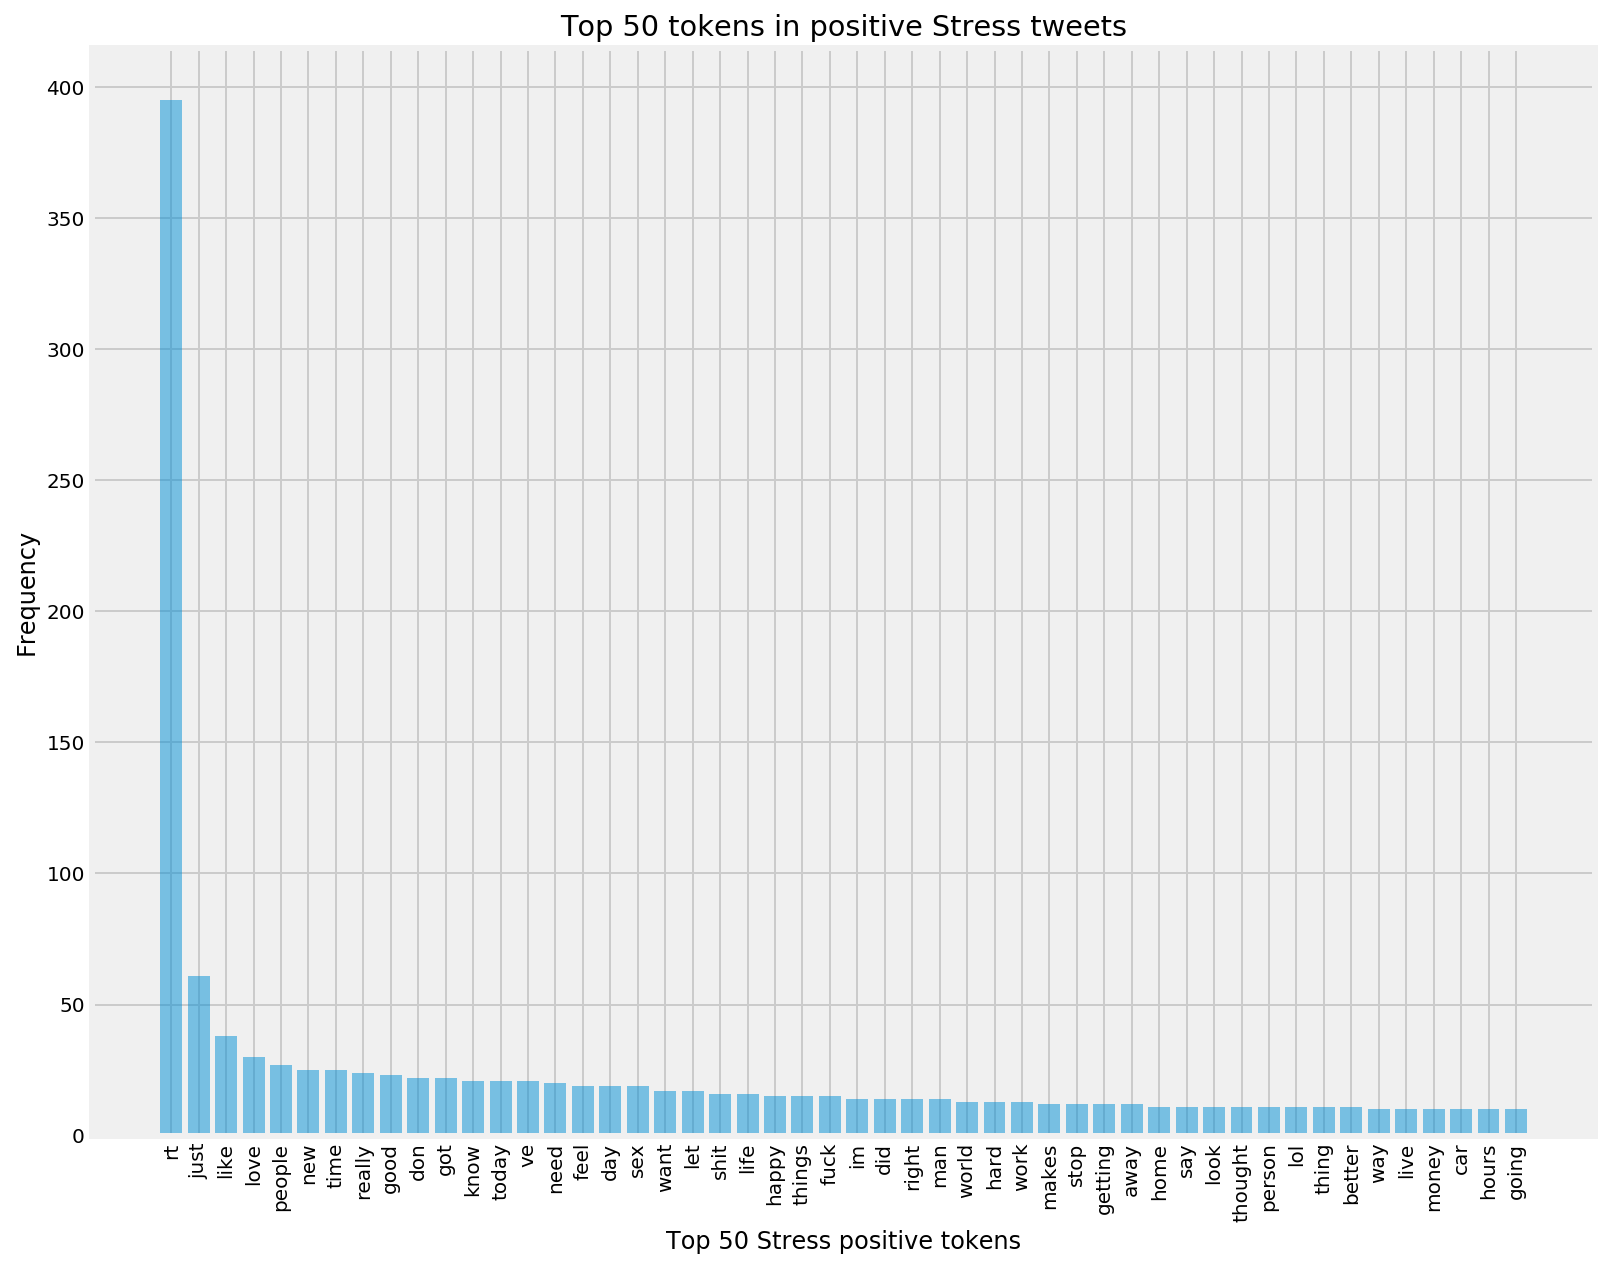

In [110]:
y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, term_freq_df2.sort_values(by='positive', ascending=False)['positive'][:50], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df2.sort_values(by='positive', ascending=False)['positive'][:50].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 Stress positive tokens')
plt.title('Top 50 tokens in positive Stress tweets')

Text(0.5, 1.0, 'Top 50 tokens in negative stress tweets')

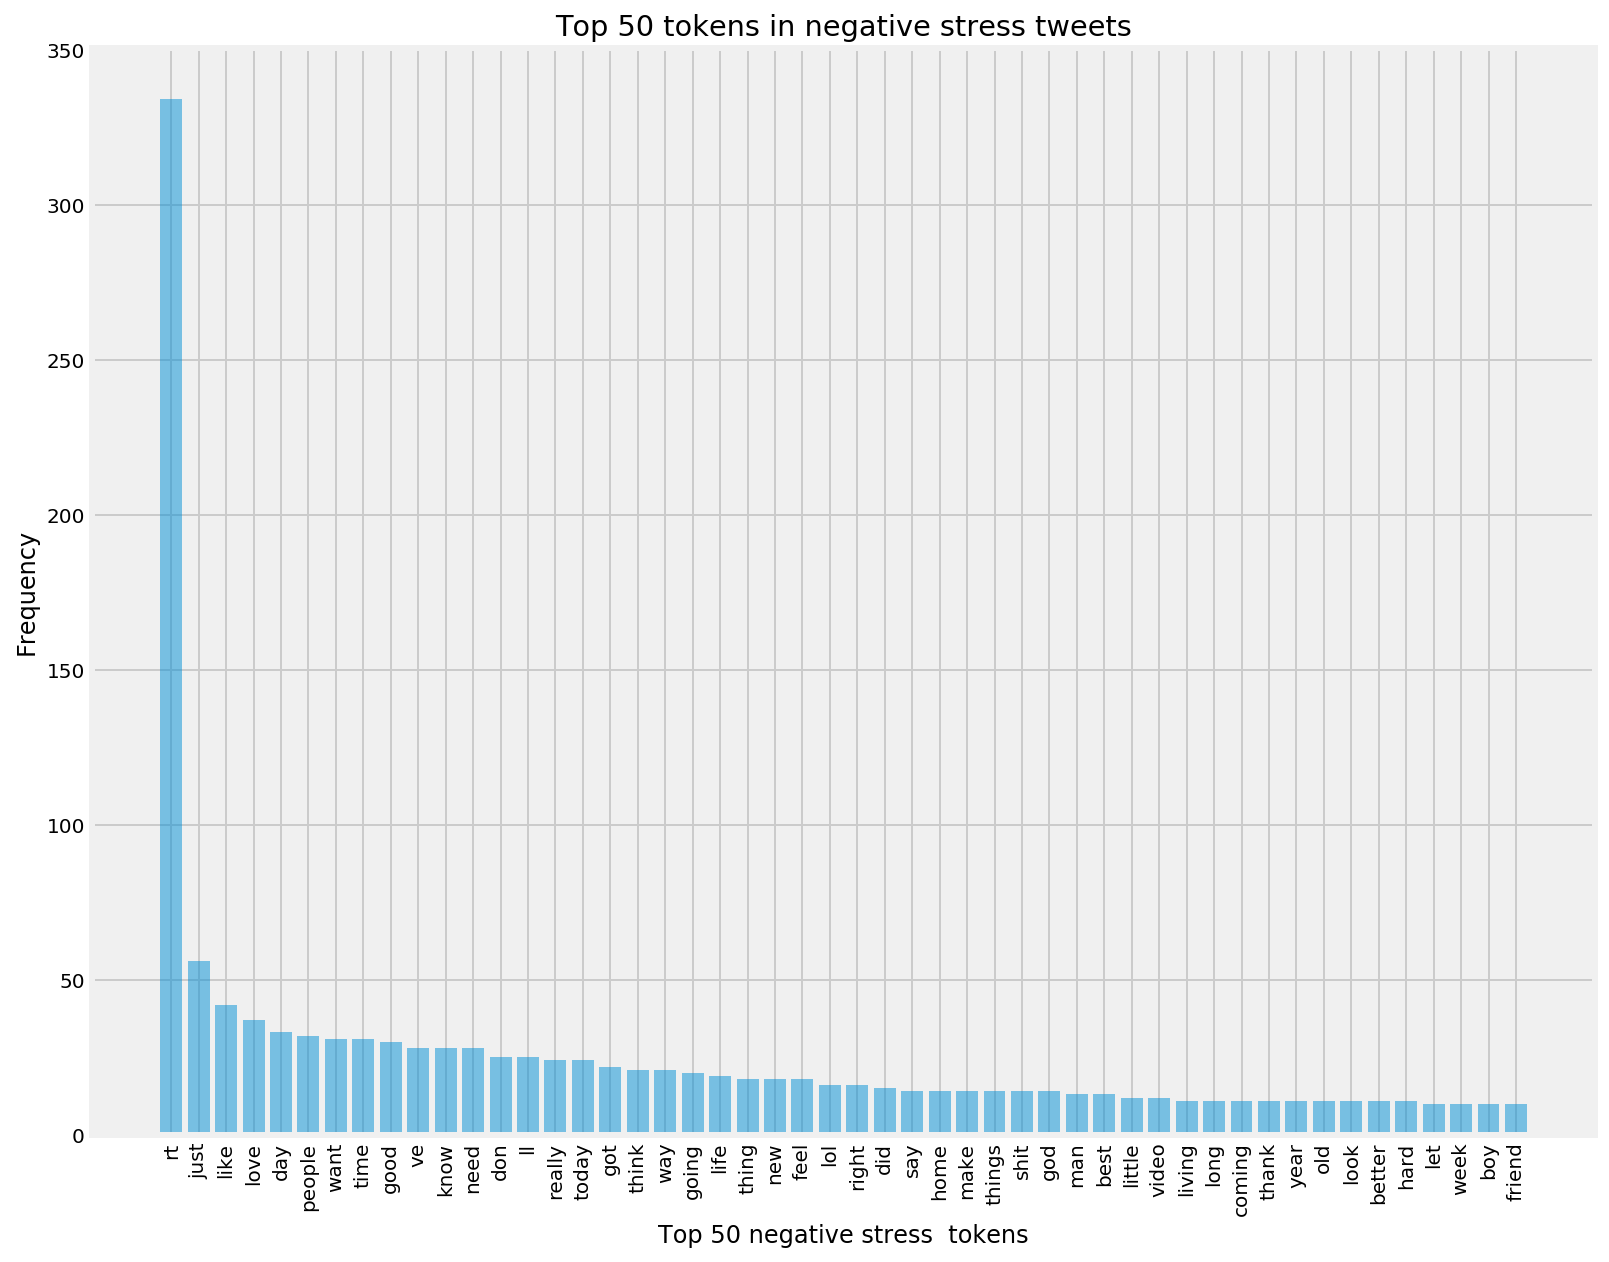

In [112]:
y_neg = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_neg, term_freq_df2.sort_values(by='negative', ascending=False)['negative'][:50], align='center', alpha=0.5)
plt.xticks(y_neg, term_freq_df2.sort_values(by='negative', ascending=False)['negative'][:50].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 negative stress  tokens')
plt.title('Top 50 tokens in negative stress tweets')

Text(0.5, 1.0, 'Negative Frequency vs Positive Frequency')

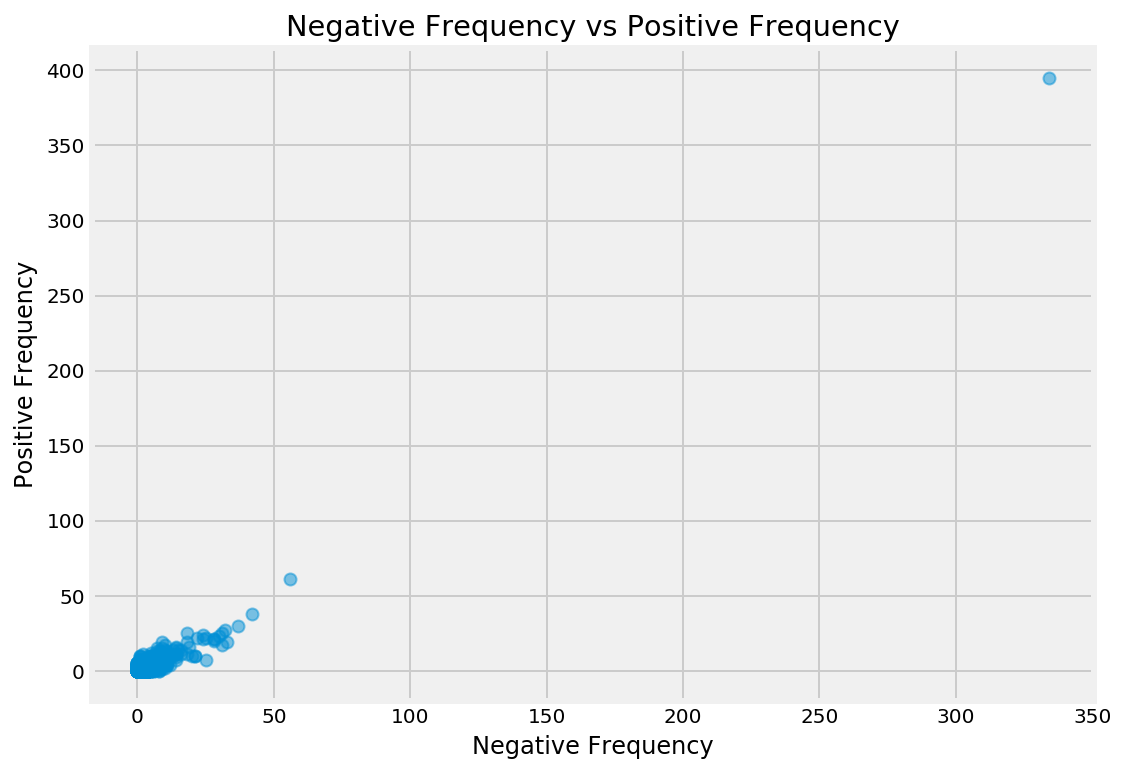

In [113]:
import seaborn as sns
plt.figure(figsize=(8,6))
ax = sns.regplot(x="negative", y="positive",fit_reg=False, scatter_kws={'alpha':0.5},data=term_freq_df2)
plt.ylabel('Positive Frequency')
plt.xlabel('Negative Frequency')
plt.title('Negative Frequency vs Positive Frequency')

In [114]:
##Meaningful metrics for characterizing each token in each class

term_freq_df2['pos_rate'] = term_freq_df2['positive'] * 1./term_freq_df2['total']
term_freq_df2.sort_values(by='pos_rate', ascending=False).iloc[:10]

,negative,positive,total,pos_rate
aaaa,0,1,1,1.0
homework,0,1,1,1.0
hmm,0,1,1,1.0
stopped,0,4,4,1.0
stilllllll,0,1,1,1.0
hollywood,0,1,1,1.0
homeboy,0,1,1,1.0
homeless,0,1,1,1.0
homesick,0,1,1,1.0
homo,0,1,1,1.0


In [115]:
term_freq_df2['pos_freq_pct'] = term_freq_df2['positive'] * 1./term_freq_df2['positive'].sum()
term_freq_df2.sort_values(by='pos_freq_pct', ascending=False).iloc[:10]

,negative,positive,total,pos_rate,pos_freq_pct
rt,334,395,729,0.541838,0.066153
just,56,61,117,0.521368,0.010216
like,42,38,80,0.475000,0.006364
love,37,30,67,0.447761,0.005024
people,32,27,59,0.457627,0.004522
new,18,25,43,0.581395,0.004187
time,31,25,56,0.446429,0.004187
really,24,24,48,0.500000,0.004019
good,30,23,53,0.433962,0.003852
don,25,22,47,0.468085,0.003684


In [116]:

#Harmonic mean with safe lambda expression

from scipy.stats import hmean
term_freq_df2['pos_hmean'] = term_freq_df2.apply(lambda x: (hmean([x['pos_rate'], x['pos_freq_pct']])                                                               if x['pos_rate'] > 0 and x['pos_freq_pct'] > 0 else 0), axis=1)
                                                       
term_freq_df2.sort_values(by='pos_hmean', ascending=False).iloc[:10]

,negative,positive,total,pos_rate,pos_freq_pct,pos_hmean
rt,334,395,729,0.541838,0.066153,0.117910
just,56,61,117,0.521368,0.010216,0.020039
like,42,38,80,0.475000,0.006364,0.012560
love,37,30,67,0.447761,0.005024,0.009937
people,32,27,59,0.457627,0.004522,0.008955
new,18,25,43,0.581395,0.004187,0.008314
time,31,25,56,0.446429,0.004187,0.008296
really,24,24,48,0.500000,0.004019,0.007975
good,30,23,53,0.433962,0.003852,0.007636
got,22,22,44,0.500000,0.003684,0.007315


In [117]:
from scipy.stats import norm
def normcdf(x):
    return norm.cdf(x, x.mean(), x.std())
term_freq_df2['pos_rate_normcdf'] = normcdf(term_freq_df2['pos_rate'])
##THIS CELL GIVES ERROR< execute other cells down

term_freq_df2['pos_freq_pct_normcdf'] = normcdf(term_freq_df2['pos_freq_pct'])
term_freq_df2['pos_normcdf_hmean'] = hmean([term_freq_df2['pos_rate_normcdf'], term_freq_df2['pos_freq_pct_normcdf']])
term_freq_df2.sort_values(by='pos_normcdf_hmean',ascending=False).iloc[:10]

/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1807: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= _b) & cond0
/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:386: RuntimeWarning: invalid value encountered in greater
  if np.all(a > 0):


ValueError: ignored

In [118]:
count=0
for i in term_freq_df2.pos_rate_normcdf:
  if(i<=0.0):
    count+=1

count2=0
for i in term_freq_df2.pos_freq_pct_normcdf:
  if(i<=0.0):
    count2+=1


print(count, count2)

0 0


In [119]:
##Using lambada expression for safe evaluation

from scipy.stats import norm
def normcdf(x):
    return norm.cdf(x, x.mean(), x.std())
term_freq_df2['pos_rate_normcdf'] = normcdf(term_freq_df2['pos_rate'])
term_freq_df2['pos_freq_pct_normcdf'] = normcdf(term_freq_df2['pos_freq_pct'])
term_freq_df2['pos_normcdf_hmean'] =term_freq_df2.apply(lambda x: (hmean([x['pos_rate_normcdf'], x['pos_freq_pct_normcdf']])
                                                                   if x['pos_rate_normcdf'] > 0 and x['pos_freq_pct_normcdf'] > 0 
                                                                   else 0), axis=1)                    
term_freq_df2.sort_values(by='pos_normcdf_hmean',ascending=False).iloc[:10]

/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1807: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= _b) & cond0


,negative,positive,total,pos_rate,pos_freq_pct,pos_hmean,pos_rate_normcdf,pos_freq_pct_normcdf,pos_normcdf_hmean
car,1,10,11,0.909091,0.001675,0.003343,0.824421,0.962096,0.887953
money,1,10,11,0.909091,0.001675,0.003343,0.824421,0.962096,0.887953
went,1,9,10,0.900000,0.001507,0.003010,0.819137,0.943073,0.876747
thought,2,11,13,0.846154,0.001842,0.003676,0.785838,0.975580,0.870489
happened,1,8,9,0.888889,0.001340,0.002676,0.812545,0.917227,0.861719
wear,1,7,8,0.875000,0.001172,0.002342,0.804100,0.883412,0.841892
artist,1,7,8,0.875000,0.001172,0.002342,0.804100,0.883412,0.841892
sun,0,5,5,1.000000,0.000837,0.001673,0.871807,0.789109,0.828399
shows,0,5,5,1.000000,0.000837,0.001673,0.871807,0.789109,0.828399
communicate,0,5,5,1.000000,0.000837,0.001673,0.871807,0.789109,0.828399


In [120]:
term_freq_df2['neg_rate'] = term_freq_df2['negative'] * 1./term_freq_df2['total']
term_freq_df2['neg_freq_pct'] = term_freq_df2['negative'] * 1./term_freq_df2['negative'].sum()
term_freq_df2['neg_hmean'] = term_freq_df2.apply(lambda x: (hmean([x['neg_rate'], x['neg_freq_pct']])
                                                                   if x['neg_rate'] > 0 and x['neg_freq_pct'] > 0 
                                                                   else 0), axis=1)                                                        
term_freq_df2['neg_rate_normcdf'] = normcdf(term_freq_df2['neg_rate'])
term_freq_df2['neg_freq_pct_normcdf'] = normcdf(term_freq_df2['neg_freq_pct'])
term_freq_df2['neg_normcdf_hmean'] = term_freq_df2.apply(lambda x: (hmean([x['neg_rate_normcdf'], x['neg_freq_pct_normcdf']])
                                                                   if x['neg_rate_normcdf'] > 0 and x['neg_freq_pct_normcdf'] > 0 
                                                                   else 0), axis=1)                  

term_freq_df2.sort_values(by='neg_normcdf_hmean', ascending=False).iloc[:10]

/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1807: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= _b) & cond0


,negative,positive,total,pos_rate,pos_freq_pct,pos_hmean,pos_rate_normcdf,pos_freq_pct_normcdf,pos_normcdf_hmean,neg_rate,neg_freq_pct,neg_hmean,neg_rate_normcdf,neg_freq_pct_normcdf,neg_normcdf_hmean
real,8,0,8,0.000000,0.000000,0.000000,0.136985,0.432948,0.208121,1.000000,0.001292,0.002581,0.863015,0.940435,0.900063
enjoy,8,0,8,0.000000,0.000000,0.000000,0.136985,0.432948,0.208121,1.000000,0.001292,0.002581,0.863015,0.940435,0.900063
self,9,1,10,0.100000,0.000167,0.000334,0.191858,0.510199,0.278854,0.900000,0.001454,0.002903,0.808142,0.962293,0.878507
note,6,0,6,0.000000,0.000000,0.000000,0.136985,0.432948,0.208121,1.000000,0.000969,0.001937,0.863015,0.868519,0.865758
blessings,6,0,6,0.000000,0.000000,0.000000,0.136985,0.432948,0.208121,1.000000,0.000969,0.001937,0.863015,0.868519,0.865758
bed,8,1,9,0.111111,0.000167,0.000334,0.198692,0.510199,0.286003,0.888889,0.001292,0.002581,0.801308,0.940435,0.865315
try,8,1,9,0.111111,0.000167,0.000334,0.198692,0.510199,0.286003,0.888889,0.001292,0.002581,0.801308,0.940435,0.865315
boy,10,2,12,0.166667,0.000335,0.000669,0.235002,0.587068,0.335645,0.833333,0.001616,0.003225,0.764998,0.977112,0.858142
photo,7,1,8,0.125000,0.000167,0.000335,0.207437,0.510199,0.294952,0.875000,0.001131,0.002259,0.792563,0.909703,0.847102
cause,7,1,8,0.125000,0.000167,0.000335,0.207437,0.510199,0.294952,0.875000,0.001131,0.002259,0.792563,0.909703,0.847102


Text(0.5, 1.0, 'neg_hmean vs pos_hmean')

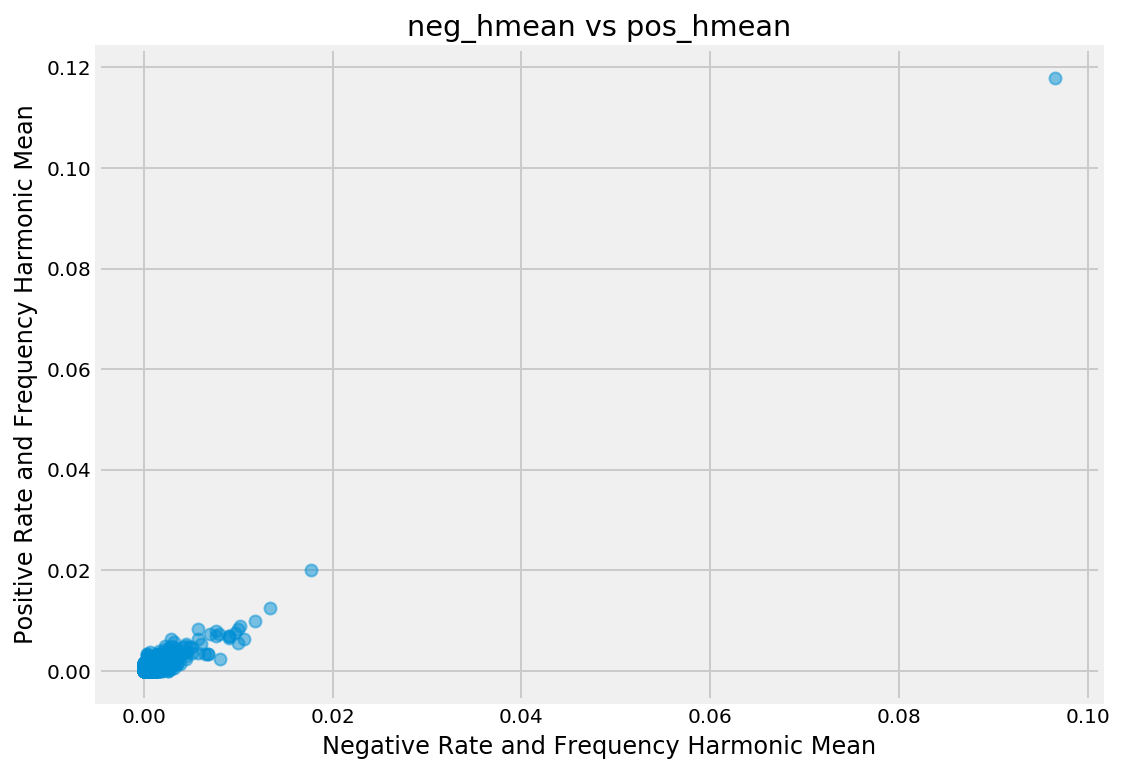

In [121]:

plt.figure(figsize=(8,6))
ax = sns.regplot(x="neg_hmean", y="pos_hmean",fit_reg=False, scatter_kws={'alpha':0.5},data=term_freq_df2)
plt.ylabel('Positive Rate and Frequency Harmonic Mean')
plt.xlabel('Negative Rate and Frequency Harmonic Mean')
plt.title('neg_hmean vs pos_hmean')

Text(0.5, 1.0, 'neg_normcdf_hmean vs pos_normcdf_hmean')

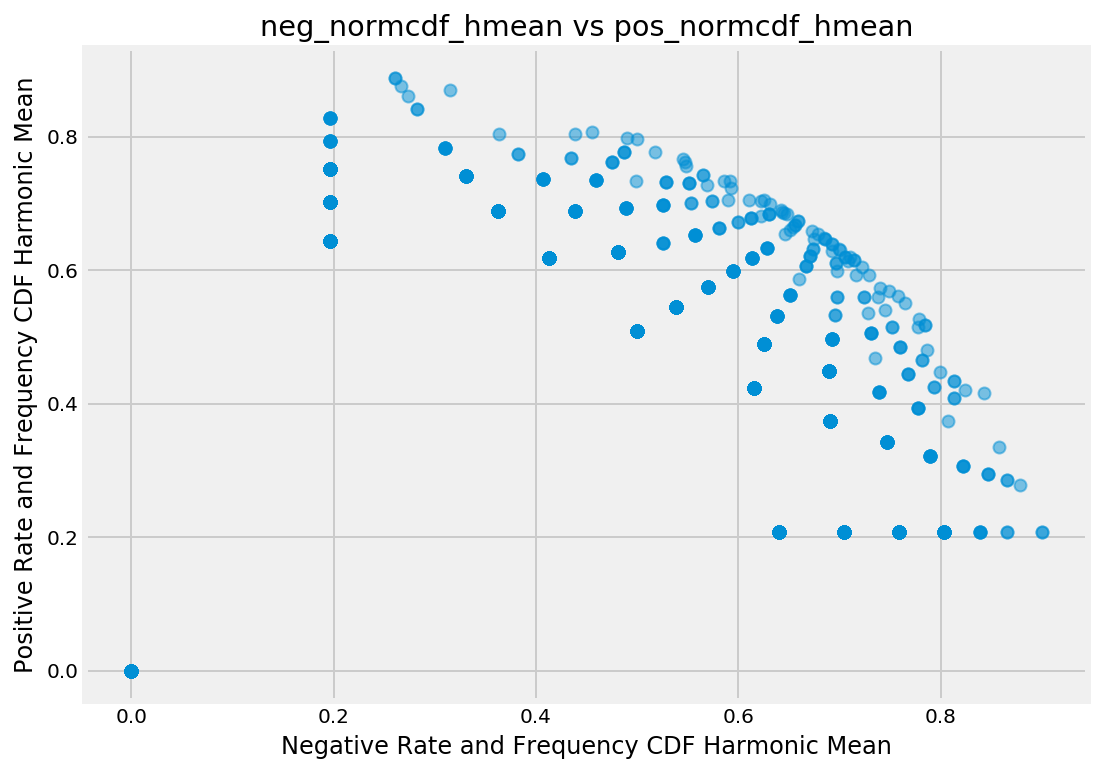

In [122]:
#Plotting cumulative df hmean of each class
plt.figure(figsize=(8,6))
ax = sns.regplot(x="neg_normcdf_hmean", y="pos_normcdf_hmean",fit_reg=False, scatter_kws={'alpha':0.5},data=term_freq_df2)
plt.ylabel('Positive Rate and Frequency CDF Harmonic Mean')
plt.xlabel('Negative Rate and Frequency CDF Harmonic Mean')
plt.title('neg_normcdf_hmean vs pos_normcdf_hmean')

In [123]:
from bokeh.plotting import figure
from bokeh.io import output_notebook, show
from bokeh.models import LinearColorMapper
from bokeh.models import HoverTool
output_notebook()
color_mapper = LinearColorMapper(palette='Inferno256', low=min(term_freq_df2.pos_normcdf_hmean), high=max(term_freq_df2.pos_normcdf_hmean))
p = figure(x_axis_label='neg_normcdf_hmean', y_axis_label='pos_normcdf_hmean')
p.circle('neg_normcdf_hmean','pos_normcdf_hmean',size=5,alpha=0.3,source=term_freq_df2,color={'field': 'pos_normcdf_hmean', 'transform': color_mapper})
hover = HoverTool(tooltips=[('token','@index')])
p.add_tools(hover)
show(p)